In [ ]:
# import os, sys 
# #to be able to interact with Google Drive's operating system
# from google.colab import drive 
# #drive is a module that allows us use Python to interact with google drive
# drive.mount('/content/gdrive') 
# #mounting google drive allows us to work with its contents
# nb_path = '/content/notebooks'
# os.symlink('/content/gdrive/My Drive/Colab Notebooks', nb_path)
# sys.path.insert(0, nb_path)  

In [1]:
!pip install  -U fastai
!pip install   -Uqq fastbook

import fastbook
fastbook.setup_book()

     |████████████████████████████████| 194kB 31.3MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 727kB 35.7MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 1.2MB 45.8MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
Mounted at /content/gdrive


In [2]:
from fastai.vision.widgets import *
from fastbook import *

In [3]:
import os
key = os.environ.get('AZURE_SEARCH_KEY', '36d9b87b6bd04362834733d202f33ac3')

In [4]:
results = search_images_bing(key, 'dogs')
ims = results.attrgot('contentUrl')
len(ims)

150

In [5]:
img_source = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg"

In [6]:
import os
os.mkdir('images')

In [7]:
dest = 'images/dog.jpg'
download_url(ims[0], dest)

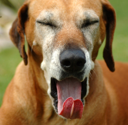

In [8]:
im = Image.open(dest)
im.to_thumb(128,128)

In [9]:
animal_types = 'cat','dog'
path = Path('animal')

In [10]:
if not path.exists():
    path.mkdir()
    for o in animal_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [11]:
fns = get_image_files(path)
fns

(#275) [Path('animal/cat/00000019.jpg'),Path('animal/cat/00000122.jpg'),Path('animal/cat/00000060.jpg'),Path('animal/cat/00000084.jpg'),Path('animal/cat/00000139.jpg'),Path('animal/cat/00000063.png'),Path('animal/cat/00000070.jpg'),Path('animal/cat/00000013.png'),Path('animal/cat/00000147.jpg'),Path('animal/cat/00000002.jpg')...]

In [12]:
doc(verify_images)

In [13]:
failed = verify_images(fns)
failed

(#0) []

In [14]:
animal_dl = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.33, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [15]:
dls = animal_dl.dataloaders(path)

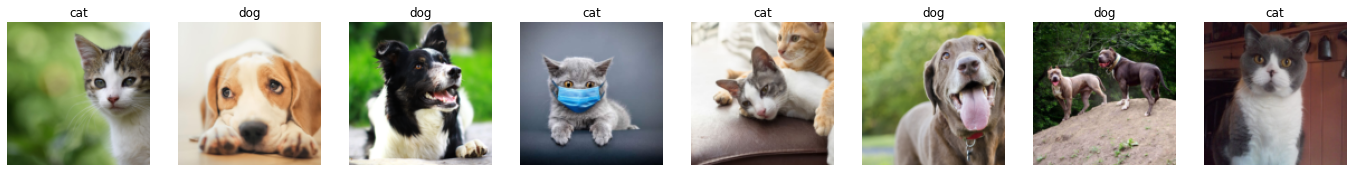

In [16]:
dls.valid.show_batch(max_n=8, nrows=1)

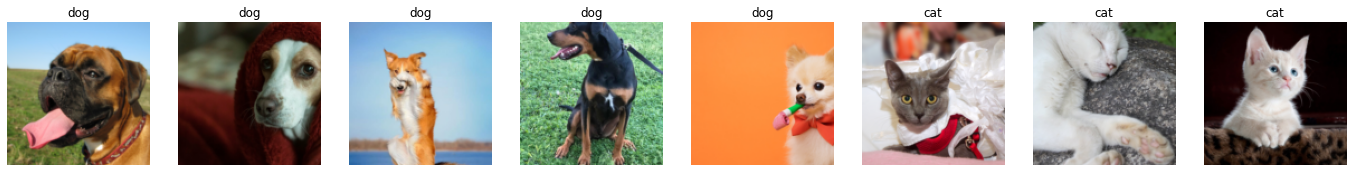

In [17]:
dls.train.show_batch(max_n=8, nrows=1)

In [18]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
#learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [19]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.107523,0.349688,0.077778,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.590103,0.322702,0.100000,00:11
1,0.488833,0.336689,0.088889,00:11
2,0.388813,0.328023,0.088889,00:11
3,0.301939,0.268596,0.100000,00:11
4,0.264222,0.214203,0.088889,00:11


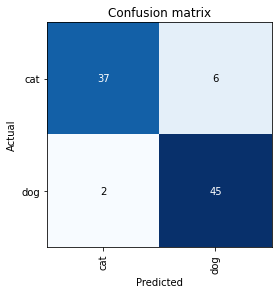

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

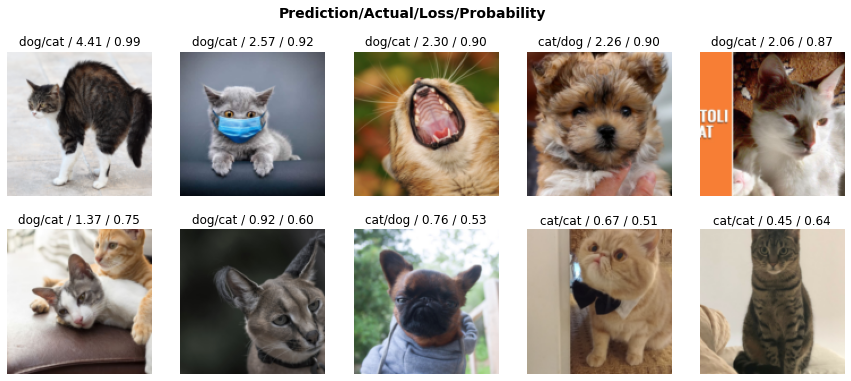

In [21]:
interp.plot_top_losses(10, nrows=2)

In [22]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [23]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [24]:
learn.export()

In [25]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [26]:
learn_inf = load_learner(path/'export.pkl')

In [27]:
learn_inf.predict('images/dog.jpg')

('dog', tensor(1), tensor([3.0560e-06, 1.0000e+00]))

In [28]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [31]:
img = PILImage.create(btn_upload.data[-1])

In [32]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [33]:
pred,pred_idx,probs = learn_inf.predict(img)

In [34]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: cat; Probability: 0.9149')

In [35]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [36]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [37]:
btn_upload = widgets.FileUpload()

In [38]:
VBox([widgets.Label('Select your image!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [39]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     |████████████████████████████████| 1.6MB 27.0MB/s 
     |████████████████████████████████| 552kB 41.2MB/s 
     |████████████████████████████████| 399kB 52.4MB/s 
     |████████████████████████████████| 122kB 57.9MB/s 
     |████████████████████████████████| 430kB 50.2MB/s 
     |████████████████████████████████| 71kB 10.9MB/s 
     |████████████████████████████████| 81kB 12.2MB/s 
ERROR: nbdev 1.1.14 has requirement nbconvert<6, but you'll have nbconvert 6.1.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
  Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
  Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled 

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
